**Jonathan Boulay**

![ai](https://www.emineo-education.fr/wp-content/uploads/2022/11/supdevinci-nantes.png)


<h4 style="text-align: left; color:#20a08d; font-size: 35px"><span><strong> Assurez la modération des contenus multimédia avec AWS</strong></span></h4>

<h4 style="text-align: left; color:#20a08d; font-size: 25px"><span><strong> Introduction
</strong></span></h4>

Le saviez-vous ? Les réseaux sociaux du groupe Meta Facebook et Instagram recueillent environ 2 milliards d'images de leurs utilisateurs tous les jours. Imaginez toute l'infrastructure informatique nécessaire pour traiter toutes ces données

![](https://github.com/archiducarmel/SupDeVinci_Developpement/releases/download/ia_ml_aws/fb.gif)

Afin de fournir des services intuitifs à leurs utilisateurs, plusieurs traitements sont réalisés sur chacune de ces images.

![](https://github.com/archiducarmel/SupDeVinci_Developpement/releases/download/ia_ml_aws/fb2.png)

Nous allons utiliser dans ce TP les services AWS pour réaliser quelques-uns de ces fonctionnalités. La finalité ultime consiste à développer une fonction de traitement qui recueille une image ou une vidéo en entrée, la modère afin de vérifier si son contenu est publiable, produit des sous-titres (dans le cas des vidéos) et fournit des hashtags issus de mots les plus représentatifs du contenu.

<h4 style="text-align: left; color:#20a08d; font-size: 25px"><span><strong> Workflow de traitement
</strong></span></h4>

Voici ci-dessous le procédé de traitement qui sera appliqué de bout-en-bout sur toute image présentée en entrée de la fonction de traitement.

![](https://github.com/archiducarmel/SupDeVinci_Developpement/releases/download/ia_ml_aws/aws_socialmedia.drawio.png)

<h4 style="text-align: left; color:#20a08d; font-size: 25px"><span><strong> Détection du type de fichier
</strong></span></h4>

La fonction `check_filetype` ci-dessous permet de déterminer le type (image ou vidéo) d'un fichier fourni en entrée.

In [1]:
import os

import os

def check_filetype(filename):
    """
    Détermine le type de fichier en fonction de son extension.

    Cette fonction prend un nom de fichier en entrée, extrait son extension et détermine
    le type de fichier (par exemple, image, vidéo). Si l'extension du fichier est reconnue comme un format
    d'image courant (jpg, png, tiff, svg) ou un format de vidéo courant (mp4, avi, mkv), elle attribue
    le type correspondant. Sinon, le type de fichier est défini sur None.

    Paramètres :
    - filename (str) : Le chemin vers le fichier incluant le nom de fichier.

    Retourne :
    - str ou None : Le type de fichier déterminé ('image', 'vidéo') ou None si le type de fichier
      n'est pas reconnu.

    Exemple :
    >>> check_filetype("/chemin/vers/image.jpg")
    'image'
    >>> check_filetype("/chemin/vers/video.mp4")
    'vidéo'
    >>> check_filetype("/chemin/vers/fichierinconnu.xyz")
    None
    """

    # Extrait le nom de base du fichier à partir du chemin de fichier fourni.
    file_basename = os.path.basename(filename)

    # Sépare le nom de base sur le point et prend la dernière partie comme extension.
    extension = file_basename.split(".")[-1]

    # Détermine le type de fichier en fonction de l'extension.
    if extension in ["jpg", "png", "tiff", "svg"]:
        filetype = "image"
    elif extension in ["mp4", "avi", "mkv"]:
        filetype = "vidéo"
    else:
        filetype = None

    # Enregistre le type de fichier détecté.
    print(f"[INFO] : Le fichier {file_basename} est de type : {filetype}")
    
    return filetype


<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Appelez la fonction <code style="text-align: left; font-size: 16px; color:#131fcf">check_filetype</code> sur la vidéo de test et l'image de test afin d'en détecter le type</span></p>

In [4]:
TEST_VIDEO_FILE = "./assets/tuto_maquillage.mp4"
TEST_IMAGE_FILE = "./assets/selfie_with_johnny-depp.png"

check_filetype(TEST_VIDEO_FILE)
check_filetype(TEST_IMAGE_FILE)


[INFO] : Le fichier tuto_maquillage.mp4 est de type : vidéo
[INFO] : Le fichier selfie_with_johnny-depp.png est de type : image


'image'

<h4 style="text-align: left; color:#20a08d; font-size: 25px"><span><strong> Extraction d'une image de la vidéo
</strong></span></h4>

La fonction `extract_frame_video` ci-dessous permet d'extraire une image sous forme de tableau de pixels d'une vidéo à partir de la position de l'image dans la vidéo

In [6]:
import cv2

def extract_frame_video(video_path, frame_id):
    """
    Extrait une image spécifique d'une vidéo.

    Cette fonction utilise OpenCV pour ouvrir une vidéo à partir du chemin spécifié et extrait une image
    particulière en fonction de son ID. L'ID de l'image correspond à l'ordre de l'image dans la vidéo, en commençant
    par 0 pour la première image. Si l'extraction réussit, l'image est retournée sous forme d'un tableau Numpy.

    Paramètres :
    - video_path (str) : Le chemin vers le fichier vidéo d'où extraire l'image.
    - frame_id (int) : L'identifiant (ID) de l'image à extraire.

    Retourne :
    - ndarray ou None : L'image extraite (un tableau Numpy) si l'extraction est réussie,
      sinon `None`.

    Exemple :
    >>> image = extract_frame_video("/chemin/vers/video.mp4", 150)
    >>> type(image)
    <class 'numpy.ndarray'>
    """

    # Ouvre la vidéo à partir du chemin fourni.
    video = cv2.VideoCapture(video_path)

    # Positionne le lecteur vidéo sur l'image spécifiée par frame_id.
    video.set(cv2.CAP_PROP_POS_FRAMES, frame_id)

    # Lit l'image actuelle.
    ret, image = video.read()

    # Si la lecture réussit (ret est True), retourne l'image.
    # Sinon, retourne None.
    return image if ret else None

<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Appelez la fonction <code style="text-align: left; font-size: 16px; color:#131fcf">extract_frame_video</code> sur la vidéo de test afin d'en extraire la première image de la vidéo, puis affichez cette image avec <code style="text-align: left; font-size: 16px; color:#131fcf">matplotlib</code></span></p>

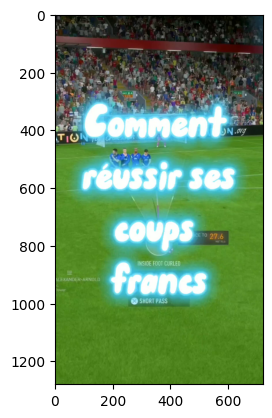

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2

TEST_VIDEO_FILE = "./assets/tuto_jeux-video.mp4"
img = extract_frame_video(TEST_VIDEO_FILE, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Appelez la fonction <code style="text-align: left; font-size: 16px; color:#131fcf">extract_frame_video</code> sur la vidéo de test afin d'en extraire la quatre vingt dix-neuvième image de la vidéo, puis affichez cette image avec <code style="text-align: left; font-size: 16px; color:#131fcf">matplotlib</code></span></p>

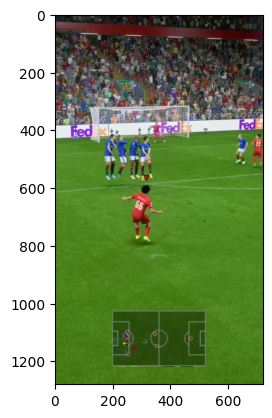

In [10]:
TEST_VIDEO_FILE = "./assets/tuto_jeux-video.mp4"
img = extract_frame_video(TEST_VIDEO_FILE, 99)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

<h4 style="text-align: left; color:#20a08d; font-size: 25px"><span><strong> Modération d'une image
</strong></span></h4>

La fonction `get_aws_session` ci-dessous permet de se connecter à une session AWS en utilisant les clés d'accès et clés secrètes.

In [129]:
!pip install rekognition_objects
# !pip install nltk

ERROR: Could not find a version that satisfies the requirement rekognition_objects (from versions: none)
ERROR: No matching distribution found for rekognition_objects


In [13]:
import os, boto3
from dotenv import load_dotenv

def get_aws_session():
    """
    Crée et retourne une session AWS.

    Cette fonction charge les variables d'environnement depuis un fichier .env situé dans le répertoire
    courant ou les parents de celui-ci, récupère les clés d'accès AWS (`ACCESS_KEY` et `SECRET_KEY`),
    et initialise une session AWS avec ces identifiants ainsi qu'avec une région spécifiée (dans cet exemple,
    'us-east-1'). Elle est particulièrement utile pour configurer une session AWS de manière sécurisée sans
    hardcoder les clés d'accès dans le code.

    Retourne :
    - Session : Un objet session de boto3 configuré avec les clés d'accès et la région AWS.

    Exemple d'utilisation :
    >>> session_aws = get_aws_session()
    >>> type(session_aws)
    <class 'boto3.session.Session'>
    """

    # Charge les variables d'environnement depuis .env.
    load_dotenv()

    # Crée une session AWS avec les clés d'accès et la région définies dans les variables d'environnement.
    aws_session = boto3.Session(
        aws_access_key_id=os.getenv("ACCESS_KEY"),        # Récupère l'ID de clé d'accès depuis les variables d'environnement.
        aws_secret_access_key=os.getenv("SECRET_KEY"),    # Récupère la clé d'accès secrète depuis les variables d'environnement.
        region_name="us-east-1"                           # Spécifie la région AWS à utiliser.
    )
    
    # Retourne l'objet session créé.
    return aws_session


Passons maintenant au développement de la fonction `moderate_image`. Cette fonction prendra en entrée une image et renverra la liste des thèmes choquants présents dans l'image, s'il y'en a. 

<p style="text-align: left; font-size: 16px; color:#7a0f43"><span>❓ Quelle service AWS serait le plus indiqué pour réaliser ce traitement ?</span></p>

**Rekognition**

<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Ecrivez le code dans la fonction  <strong>moderate_image</strong> permettant d'analyser une image et détecter les sujets de modération </span></p>

In [ ]:
def moderate_image(image_path, aws_service):
    """
    Détecte du contenu nécessitant une modération dans une image en utilisant un service AWS spécifié.

    Cette fonction ouvre une image depuis un chemin donné, puis utilise le service AWS (comme Amazon Rekognition)
    pour détecter les contenus potentiellement inappropriés ou sensibles (comme la nudité, la violence, etc.).
    Elle collecte et retourne une liste des étiquettes de modération identifiées pour cette image.

    Paramètres :
    - image_path (str) : Le chemin vers l'image à analyser.
    - aws_service (object) : Un objet de service AWS configuré, capable de réaliser des opérations de détection
      de contenu nécessitant une modération (par exemple, un client Amazon Rekognition).

    Retourne :
    - list[str] : Une liste des noms des étiquettes de modération détectées pour l'image.

    Exemple d'utilisation :
    >>> aws_rekognition_client = boto3.client('rekognition', region_name='us-east-1')
    >>> moderate_image("/chemin/vers/image.jpg", aws_rekognition_client)
    ['Nudity', 'Explicit Violence']
    """

    with open(image_path, "rb") as image_file:
        image_bytes = image_file.read()

    response = aws_service.detect_moderation_labels(
        Image={'Bytes': image_bytes}
    )

    labels = [label["Name"] for label in response.get("ModerationLabels", [])]

    return labels


<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Ecrivez le code permettant de tester la fonction  <strong>moderate_image</strong>. Pour ce faire : <ul style="text-align: left; font-size: 16px; color:#131fcf">
    <li>Instancier une session AWS avec vos clés</li>
    <li>Instancier le service AWS approprié pour ce traitement </li>
    <li>Appelez la fonction <code style="text-align: left; font-size: 16px; color:#131fcf">moderate_image</code> avec ce service comme argument afin de recueillir la liste potentielle des thèmes choquants</li>
    </ul> </span></p>

In [268]:
TEST_IMAGE_FILE_1 = "./assets/haine.png"
TEST_IMAGE_FILE_2 = "./assets/vulgaire.png"
TEST_IMAGE_FILE_3 = "./assets/violence1.png"
TEST_IMAGE_FILE_4 = "./assets/no-violence1.png"


aws_session = get_aws_session()
rekognition = aws_session.client('rekognition')
result = moderate_image(TEST_IMAGE_FILE_1, rekognition)
print(result)

['Nazi Party', 'Hate Symbols']


<h4 style="text-align: left; color:#20a08d; font-size: 25px"><span><strong> Production de sous-titres
</strong></span></h4>

La production de sous-titres à partir d'une vidéo s'appuiera sur la technologie speech-to-text d'AWS.

<div class="alert alert-info">
  <strong>BUCKET S3</strong><br><br> Au préalable, assurez-vous d'avoir créé un bucket S3 puisque la transcription speech-to-text nécessite que le fichier transcrit soit déposé dans un bucket S3
</div>

<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Ecrivez le code permettant d'instancier un client S3 puis de créer un bucket </span></p>

In [21]:
s3 = aws_session.client('s3')
bucket = s3.create_bucket(Bucket="translatejby")

<p style="text-align: left; font-size: 16px; color:#7a0f43"><span>❓ Quelle service AWS serait le plus indiqué pour réaliser ce traitement de transcription speech-to-text ?</span></p>

**Transcribe**

<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Ecrivez le code de la fonction <code style="text-align: left; font-size: 16px; color:#131fcf">get_text_from_speech</code> permettant de réaliser la transcription speech-to-text avec AWS</span></p>

<p style="text-align: left; font-size: 16px; color:#ec8f1a"><span>📚  Voice to text using AWS Transcribe : </span> <a href="https://dev.to/botreetechnologies/voice-to-text-using-aws-transcribe-with-python-1cfc">https://dev.to/botreetechnologies/voice-to-text-using-aws-transcribe-with-python-1cfc</a></p> 

In [ ]:
import os
import time
import urllib.request
import json

def get_text_from_speech(filename, aws_service, job_name, bucket_name):
    """
    Convertit de la parole en texte en utilisant AWS Transcribe.

    Cette fonction téléverse un fichier audio spécifié dans un seau S3, démarre un travail de transcription avec AWS Transcribe,
    attend que le travail soit terminé, et récupère le texte transcrit.

    Paramètres :
    - filename (str) : Chemin local vers le fichier audio à transcrire.
    - aws_service (object) : Client AWS Transcribe configuré.
    - job_name (str) : Nom unique pour le travail de transcription.
    - bucket_name (str) : Nom du seau S3 où le fichier audio est stocké.

    Retourne :
    - str : Le texte transcrit du fichier audio.

    Prérequis :
    - Le fichier audio doit déjà être téléversé dans le seau S3 spécifié.
    """
    
    img = filename.split("/")[-1]

    s3_uri = f"s3://{bucket_name}/{img}"

    # Démarrer la transcription avec la bonne URL S3
    aws_service.start_transcription_job(
        TranscriptionJobName=job_name,
        Media={'MediaFileUri': s3_uri},
        MediaFormat='mp4', 
        LanguageCode='fr-FR'
    )

    # Attendre que le job soit terminé
    while True:
        status = aws_service.get_transcription_job(TranscriptionJobName=job_name)
        job_status = status["TranscriptionJob"]["TranscriptionJobStatus"]

        if job_status in ["COMPLETED", "FAILED"]:
            break
        print(f"Job en cours... ({job_status})")
        time.sleep(10)

    if job_status == "COMPLETED":
        # Récupérer l'URL du fichier transcrit
        transcript_url = status["TranscriptionJob"]["Transcript"]["TranscriptFileUri"]

        
        with urllib.request.urlopen(transcript_url) as response:
            data = json.loads(response.read())

        return data["results"]["transcripts"][0]["transcript"]
    else:
        return "La transcription a échoué."

    return f"Transcription job '{job_name}' started for {s3_uri}"


<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Ecrivez le code permettant de tester la fonction  <strong>get_text_from_speech</strong>. Pour ce faire : <ul style="text-align: left; font-size: 16px; color:#131fcf">
    <li>Uploader la vidéo de test sur le bucket de test préalablement créé</li>
    <li>Instancier le service AWS approprié pour ce traitement </li>
    <li>Appelez la fonction <code style="text-align: left; font-size: 16px; color:#131fcf">get_text_from_speech</code> avec ce service comme argument afin de recueillir le texte recueilli</li>
    </ul> </span></p>

In [ ]:
import os

TEST_VIDEO_FILE = "./assets/tuto_coiffure.mp4"
BUCKET_NAME = 'test-bucket-sdvnantes-2jby'

img = TEST_VIDEO_FILE.split("/")[-1]
transcribe = aws_session.client('transcribe')

# bucket = s3.create_bucket(Bucket=BUCKET_NAME)
# s3.upload_file(TEST_VIDEO_FILE, BUCKET_NAME, img)


sousTitre = get_text_from_speech(TEST_VIDEO_FILE, transcribe, "test6", BUCKET_NAME)
print(sousTitre)


Job en cours... (IN_PROGRESS)
Job en cours... (IN_PROGRESS)
Job en cours... (IN_PROGRESS)
Job en cours... (IN_PROGRESS)
Job en cours... (IN_PROGRESS)
je me fais une petite coiffure qui est scooter parce que dans Paris en ce moment, c'est du grand n'importe quoi, que ce soit au niveau des transports en commun, au niveau des taxis. Bref, c'est le gros bordel. Donc on s'est dit Ouais, le scooter, ça peut être plus facile pour les rendez-vous. Du coup, on prend les scooters, vous savez électriques en location là qui sont partout dans la rue. Et le petit souci, c'est que du coup on prend les casques d'autrui, les gens passent et prennent leur casque. Logique. Et même s'il y a des Charlotte, j'avoue que moi ça me j'ai un peu de mal. Donc aujourd'hui on va acheter nos propres casques. Ah, j'ai fait des petites parties comme ça et maintenant je vais faire une deuxième section derrière. Je vais bien tout tuer. Voilà à quoi ça ressemble. Mais je pense que je vais me perfectionner. Et voilà, je p

<h4 style="text-align: left; color:#20a08d; font-size: 25px"><span><strong> Production de hashtags d'une séquence vidéo
</strong></span></h4>

La production de hashtag sur une séquence vidéo se base sur le texte extrait de la vidéo après l'étape de speech-to-text, qui sera utilisé pour en extraire des mots-clés (keyphrases). Au préalable, le texte extrait devra être nettoyé pour y enlever quelques éléments inutiles. C'est la fonction de la fonction `clean_text`

In [70]:
import shutil
import nltk
import os

punkt_path = os.path.join("C:/Users/Jonathan/AppData/Roaming/nltk_data", "tokenizers", "punkt")

# Supprime l'ancien dossier punkt
shutil.rmtree(punkt_path, ignore_errors=True)

# Réinstalle punkt
nltk.download('punkt', download_dir="C:/Users/Jonathan/AppData/Roaming/nltk_data")




[nltk_data] Downloading package punkt to
[nltk_data]     C:/Users/Jonathan/AppData/Roaming/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [83]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

def clean_text(raw_text):
    """
    Nettoie un texte en retirant les mots vides et en normalisant les mots en minuscules.

    Cette fonction prend un texte brut en entrée, tokenise le texte pour séparer les mots,
    convertit les mots en minuscules, et retire les mots vides (stop words) en français. Les mots vides
    supplémentaires peuvent être ajoutés à la liste. Le texte résultant contient uniquement les mots significatifs
    en minuscules.

    Paramètres :
    - raw_text (str) : Le texte brut à nettoyer.

    Retourne :
    - str : Le texte nettoyé, sans mots vides et en minuscules.

    Exemple d'utilisation :
    >>> texte_brut = "Ceci est un exemple de texte à nettoyer."
    >>> clean_text(texte_brut)
    'exemple texte nettoyer'
    """

    tokenizer = RegexpTokenizer(r'\w+|\$[\d\.]+|\S+')

    # Tokenisation (séparation des mots)
    tokens = tokenizer.tokenize(raw_text)

    # Mise en minuscules et suppression de la ponctuation
    tokens = [word.lower() for word in tokens if word.isalnum()]

    # Chargement des stop words en français
    stop_words = set(stopwords.words('french'))

    # Filtrage des mots vides
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Retour du texte nettoyé
    return " ".join(filtered_tokens)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jonathan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Appelez la fonction <code style="text-align: left; font-size: 16px; color:#131fcf">clean_text</code> le texte extrait afin de recueillir un texte nettoyé</span></p>

In [84]:
text_clean = clean_text(sousTitre)
print(text_clean)

fais petite coiffure scooter parce paris moment grand quoi niveau transports commun niveau taxis bref gros bordel donc dit ouais scooter ça peut être plus facile rendez coup prend scooters savez électriques location là partout rue petit souci coup prend casques gens passent prennent casque logique a charlotte ça peu mal donc aujourd va acheter propres casques ah fait petites parties comme ça maintenant vais faire deuxième section derrière vais bien tout tuer voilà quoi ça ressemble pense vais perfectionner voilà pourrais aller acheter petit casque faire scooter sans être décoiffée


<p style="text-align: left; font-size: 16px; color:#7a0f43"><span>❓ Quelle service AWS serait le plus indiqué pour réaliser ce traitement d'extraction des "key phrases" ?</span></p>

**Comprehend**

<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Ecrivez le code de la fonction <code style="text-align: left; font-size: 16px; color:#131fcf">extract_keyphrases</code> permettant d'extraire les mots clés d'un texte en entrée. Ne retenez que les 10 mots-clés détectés avec le plus de confiance</span></p>

In [86]:
def extract_keyphrases(text, aws_service):
    """
    Extrait les expressions clés d'un texte et retourne les 10 expressions les plus pertinentes comme hashtags.

    Cette fonction utilise un service AWS, tel que Amazon Comprehend, pour détecter les expressions clés dans
    un texte donné. Elle trie ces expressions par leur score de pertinence fourni par AWS et retourne les 10
    expressions clés les plus pertinentes sous forme de hashtags.

    Paramètres :
    - text (str) : Le texte duquel extraire les expressions clés.
    - aws_service (object) : Un objet de service AWS configuré pour détecter les expressions clés.

    Retourne :
    - list[str] : Une liste des 10 hashtags les plus pertinents basés sur les expressions clés du texte.

    Exemple d'utilisation :
    >>> aws_comprehend_client = boto3.client('comprehend', region_name='us-east-1')
    >>> extract_keyphrases("Ceci est un exemple de texte.", aws_comprehend_client)
    ['#exemple', '#texte']
    """

    response = aws_service.detect_key_phrases(Text=text, LanguageCode='fr')
    
    key_phrases = response['KeyPhrases']
    
    key_phrases_sorted = sorted(key_phrases, key=lambda x: x['Score'], reverse=True)
    
    top_key_phrases = key_phrases_sorted[:10]
    
    hashtags = ['#' + phrase['Text'].replace(" ", "").lower() for phrase in top_key_phrases]
    
    return hashtags


<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Ecrivez le code permettant de tester la fonction  <strong>extract_keyphrases</strong>. Pour ce faire : <ul style="text-align: left; font-size: 16px; color:#131fcf">
    <li>Instancier le service AWS approprié pour ce traitement </li>
    <li>Appelez la fonction <code style="text-align: left; font-size: 16px; color:#131fcf">extract_keyphrases</code> avec ce service comme argument afin de recueillir la liste des mots-clés</li>
    </ul> </span></p>

In [90]:
comprehend = aws_session.client('comprehend')
extract_keyphrases(text_clean, comprehend)

['#ça',
 '#petitesparties',
 '#casques',
 '#scooter',
 '#ça',
 '#scooters',
 '#petitecoiffure',
 '#quoi',
 '#proprescasques',
 '#scooter']

<h4 style="text-align: left; color:#20a08d; font-size: 25px"><span><strong> Production de hashtags d'une image
</strong></span></h4>

La production de hashtags sur une image se base sur la détection des objets et des célébrités présents dans l'image.

<h4 style="text-align: left; color:#20a08d; font-size: 20px"><span><strong> Détection d'objets sur une image
</strong></span></h4>

<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Ecrivez le code de la fonction <code style="text-align: left; font-size: 16px; color:#131fcf">detect_objects</code> permettant de détecter les objets présents sur une image donnée en entrée de la fonction. Ne retenez que les 10 objets détectés avec le plus de confiance.</span></p>

In [107]:
def detect_objects(image_path, aws_service):
    """
    Détecte les objets dans une image en utilisant Amazon Rekognition.

    Cette fonction ouvre une image depuis un chemin spécifié, utilise un service AWS (Amazon Rekognition) pour
    détecter les objets présents dans l'image avec une confiance minimale de 50%, et retourne les noms des 10
    objets les plus pertinents détectés.

    Paramètres :
    - image_path (str) : Le chemin vers l'image à analyser.
    - aws_service (object) : Un client AWS Rekognition configuré.

    Retourne :
    - list[str] : Une liste contenant les noms des 10 premiers objets détectés dans l'image.

    Exemple d'utilisation :
    >>> aws_rekognition_client = boto3.client('rekognition', region_name='us-east-1')
    >>> detect_objects("/chemin/vers/image.jpg", aws_rekognition_client)
    ['Voiture', 'Arbre', 'Personne']
    """

    with open(image_path, 'rb') as image:

        response = aws_service.detect_labels(
            Image={
                'Bytes': image.read()
            },
            MaxLabels=10,
            MinConfidence=50)

        # display(response)
        # print(len(response['Labels']))
        return response['Labels']
    

    


<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Ecrivez le code permettant de tester la fonction  <strong>detect_objects</strong>. Pour ce faire : <ul style="text-align: left; font-size: 16px; color:#131fcf">
    <li>Instancier le service AWS approprié pour ce traitement </li>
    <li>Appelez la fonction <code style="text-align: left; font-size: 16px; color:#131fcf">detect_objects</code> avec ce service comme argument afin de recueillir la liste des objets présents sur cette image de test</li>
    </ul> </span></p>

In [108]:
TEST_IMAGE_FILE = "./assets/no-violence4.png"

rekognition = aws_session.client('rekognition')
objects = detect_objects(TEST_IMAGE_FILE, rekognition)
print(objects)


[{'Name': 'People', 'Confidence': 99.99998474121094, 'Instances': [], 'Parents': [{'Name': 'Person'}], 'Aliases': [], 'Categories': [{'Name': 'Person Description'}]}, {'Name': 'Person', 'Confidence': 99.99998474121094, 'Instances': [{'BoundingBox': {'Width': 0.18924276530742645, 'Height': 0.6005271077156067, 'Left': 0.7228755354881287, 'Top': 0.2801356911659241}, 'Confidence': 98.13263702392578}, {'BoundingBox': {'Width': 0.20567560195922852, 'Height': 0.5932380557060242, 'Left': 0.0002807489945553243, 'Top': 0.24788646399974823}, 'Confidence': 98.13009643554688}, {'BoundingBox': {'Width': 0.15440912544727325, 'Height': 0.6412093043327332, 'Left': 0.26465702056884766, 'Top': 0.24852019548416138}, 'Confidence': 97.95296478271484}, {'BoundingBox': {'Width': 0.16155143082141876, 'Height': 0.6419530510902405, 'Left': 0.5529497265815735, 'Top': 0.2773016691207886}, 'Confidence': 97.29861450195312}, {'BoundingBox': {'Width': 0.1144249439239502, 'Height': 0.49842432141304016, 'Left': 0.153485

<h4 style="text-align: left; color:#20a08d; font-size: 20px"><span><strong> Détection des célébrités sur une image
</strong></span></h4>

<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Ecrivez le code de la fonction <code style="text-align: left; font-size: 16px; color:#131fcf">detect_celebrities</code> permettant de détecter les célébrités présents sur une image donnée en entrée de la fonction.</span></p>

In [138]:
import boto3

def detect_celebrities(image_path, aws_service):
    """
    Identifie les célébrités dans une image en utilisant le service Amazon Rekognition.

    Cette fonction ouvre une image depuis un chemin donné et utilise le service AWS Rekognition pour reconnaître les
    célébrités présentes dans l'image. Elle retourne une liste contenant les noms des célébrités identifiées, limitée
    aux 10 premiers résultats pour simplifier l'output.

    Paramètres :
    - image_path (str) : Le chemin vers l'image dans laquelle détecter les célébrités.
    - aws_service (object) : Un client AWS Rekognition configuré.

    Retourne :
    - list[str] : Une liste des noms des célébrités identifiées dans l'image, jusqu'à un maximum de 10.

    Exemple d'utilisation :
    >>> aws_rekognition_client = boto3.client('rekognition', region_name='us-east-1')
    >>> detect_celebrities("/chemin/vers/limage.jpg", aws_rekognition_client)
    ['Leonardo DiCaprio', 'Kate Winslet']
    """

    with open(image_path, 'rb') as image:
        try:
            # Utiliser la méthode `detect_celebrities` pour identifier les célébrités
            response = aws_service.recognize_celebrities(
                Image={'Bytes': image.read()}
            )
            celebrities = [celebrity['Name'] for celebrity in response.get('CelebrityFaces', [])]
            # logger.info("Detected %s celebrities.", len(celebrities))
        except Exception as e:
            print(f"Couldn't detect celebrities in {image_path}. Error: {str(e)}")
            raise
        else:
            return celebrities[:10]


<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Ecrivez le code permettant de tester la fonction  <strong>detect_celebrities</strong>. Pour ce faire : <ul style="text-align: left; font-size: 16px; color:#131fcf">
    <li>Instancier le service AWS approprié pour ce traitement </li>
    <li>Appelez la fonction <code style="text-align: left; font-size: 16px; color:#131fcf">detect_celebrities</code> avec ce service comme argument afin de recueillir la liste des célébrités présentes sur chacune des images de test</li>
    </ul> </span></p>

In [141]:
TEST_IMAGE_FILE_1 = "./assets/selfie_with_mariah-carey.png"
TEST_IMAGE_FILE_2 = "./assets/selfie_with_johnny-depp.png"
TEST_IMAGE_FILE_3 = "./assets/selfie_with_kanye-west.png"

rekognition = aws_session.client('rekognition')
print(detect_celebrities(TEST_IMAGE_FILE_3, rekognition))

['Kanye West', 'Maher Zain']


<h4 style="text-align: left; color:#20a08d; font-size: 20px"><span><strong> Reconnaissance d'émotion faciale sur une image
</strong></span></h4>

<span style="color:#131fcf">🖥️ Codez la fonction `detect_emotions` qui doit :

<ul style="color:#131fcf">
<li>Prendre en entrée :
  <ul>
    <li>Le chemin de l'image à analyser</li>
    <li>Le client AWS Rekognition configuré</li>
  </ul>
</li>

<li>Analyser l'image :
  <ul>
    <li>Ouvrir l'image en mode binaire</li>
    <li>Utiliser Rekognition avec <strong>detect_faces</strong></li>
    <li>Demander tous les attributs (Attributes=['ALL'])</li>
  </ul>
</li>

<li>Pour chaque visage détecté, afficher :
  <ul>
    <li>Le genre avec son niveau de confiance</li>
    <li>L'âge estimé (range min-max)</li>
    <li>Les 3 émotions principales avec leur niveau de confiance</li>
  </ul>
</li>

<li>Retourner la liste complète des informations des visages détectés</li>

<li>Exemple de sortie console attendue :
<code style="color:#131fcf">
[INFO] Visage détecté:
  - Genre: Male (confiance: 99.9%)
  - Âge estimé: 20-30 ans
  - Émotions principales:
    * HAPPY: 95.5%
    * CALM: 4.5%
---
</code>
</li>
</ul>
</span>

In [ ]:
def detect_emotions(image_path, aws_service):
    """
    Détecte les émotions sur les visages présents dans une image en utilisant Amazon Rekognition.
    
    Cette fonction analyse une image pour détecter les visages et leurs émotions associées.
    Pour chaque visage, elle retourne les émotions détectées avec leur niveau de confiance.
    
    Paramètres :
    - image_path (str) : Chemin vers l'image à analyser
    - aws_service (boto3.client) : Client AWS Rekognition configuré
    
    Retourne :
    - list[dict] : Liste des visages détectés avec leurs émotions
                  Format: [
                      {
                          'BoundingBox': dict,
                          'Emotions': [
                              {
                                  'Type': str,  # HAPPY, SAD, ANGRY, CONFUSED, etc.
                                  'Confidence': float
                              },
                              ...
                          ],
                          'AgeRange': {'Low': int, 'High': int},
                          'Gender': {'Value': str, 'Confidence': float}
                      },
                      ...
                  ]
    
    Exemple :
    >>> rekognition = boto3.client('rekognition')
    >>> emotions = detect_emotions("./photo.jpg", rekognition)
    >>> for face in emotions:
    ...     print(f"Émotions détectées : {face['Emotions']}")
    """

    list = []

    with open(image_path, 'rb') as image_file:

        response = aws_service.detect_faces(
                    Image={
                    'Bytes': image_file.read()
                }, Attributes=["GENDER","AGE_RANGE",  "EMOTIONS"]
            )
        
        for face in response['FaceDetails'] : 
            dico = {}
            dico['Gender'] = face['Gender']
            dico['AgeRange'] = face['AgeRange']
            dico['Emotions'] = face['Emotions']
            list.append(dico)

        return list


In [192]:
print(detect_emotions(TEST_IMAGE_FILE_1, rekognition))

[{'Gender': {'Value': 'Female', 'Confidence': 99.72036743164062}, 'AgeRange': {'Low': 24, 'High': 32}, 'Emotions': [{'Type': 'HAPPY', 'Confidence': 99.34895324707031}, {'Type': 'SURPRISED', 'Confidence': 0.054776668548583984}, {'Type': 'CALM', 'Confidence': 0.043654441833496094}, {'Type': 'DISGUSTED', 'Confidence': 0.03440380096435547}, {'Type': 'ANGRY', 'Confidence': 0.027108192443847656}, {'Type': 'CONFUSED', 'Confidence': 0.025590261444449425}, {'Type': 'FEAR', 'Confidence': 0.006556510925292969}, {'Type': 'SAD', 'Confidence': 0.0001251697540283203}]}, {'Gender': {'Value': 'Female', 'Confidence': 97.74151611328125}, 'AgeRange': {'Low': 25, 'High': 33}, 'Emotions': [{'Type': 'HAPPY', 'Confidence': 98.69792175292969}, {'Type': 'SURPRISED', 'Confidence': 0.17511844635009766}, {'Type': 'CALM', 'Confidence': 0.14858245849609375}, {'Type': 'CONFUSED', 'Confidence': 0.042955078184604645}, {'Type': 'DISGUSTED', 'Confidence': 0.023686885833740234}, {'Type': 'FEAR', 'Confidence': 0.0106215476

<span style="color:#131fcf">🖥️ Codez la fonction `summarize_emotions` qui doit :

<ul style="color:#131fcf">
<li>Prendre en entrée une liste de visages détectés dans une image comme fourni par la fonction <code>detect_emotions</code></li>
<li>Exemple d'entrée :
<code style="color:#131fcf">
[{
    'Gender': {'Value': 'Male', 'Confidence': 99.9},
    'AgeRange': {'Low': 20, 'High': 30},
    'Emotions': [
        {'Type': 'HAPPY', 'Confidence': 95.5},
        {'Type': 'CALM', 'Confidence': 4.5}
    ]
}]
</code>
<li>Pour chaque visage, analyser :
  <ul>
    <li>Le genre (Homme/Femme)</li>
    <li>L'âge (calcul de la moyenne du range)</li>
    <li>Les émotions avec une confiance > 50%</li>
  </ul>
</li>

<li>Retourner un dictionnaire avec :
  <ul>
    <li>Nombre total de visages</li>
    <li>Émotion dominante (celle avec la plus haute confiance moyenne)</li>
    <li>Statistiques des émotions (comptage et confiance moyenne)</li>
    <li>Statistiques d'âge (min, max, moyenne)</li>
    <li>Distribution des genres</li>
  </ul>
</li>
</li>
</ul>
</span>

In [251]:
def summarize_emotions(faces_info):
    """
    Résume les émotions détectées sur tous les visages d'une image.
    
    Cette fonction agrège les émotions de tous les visages et calcule les émotions
    dominantes dans l'image.
    
    Paramètres :
    - faces_info (list[dict]) : Liste des informations des visages détectés
    
    Retourne :
    - dict : Résumé des émotions dominantes et statistiques
    
    Exemple :
    >>> emotions = detect_emotions("./group_photo.jpg", rekognition)
    >>> summary = summarize_emotions(emotions)
    >>> print(f"Émotion dominante : {summary['dominant_emotion']}")
    """
    dict = {}
    dicoGenre = {'Male': 0, 'Female': 0}
    listAge = []
    dicoEmotions = {}
    dicoTotal = {}
    min = -1
    max = -1
    meilleurEmotion = []
    
    for face in faces_info:
        # Genre
        genre = face['Gender']['Value']
        nbrG = dicoGenre[genre]
        dicoGenre[genre] = nbrG + 1

        # Age
        age = face['AgeRange']
        minX = age['Low']
        maxX = age['High']

        if min > minX or min == -1 :
            min = minX
        if max < maxX or max == -1 : 
            max = maxX

        listAge.append(minX)
        listAge.append(maxX)

        # Emotions

        emotions = face['Emotions']

        if len(meilleurEmotion) == 0:
            meilleurEmotion = emotions[0]
        else :
            if(emotion['Confidence'] > meilleurEmotion['Confidence']):
                meilleurEmotion = emotion
        
        for emotion in emotions:
            type = emotion['Type']
            if type not in dicoEmotions.keys() : 
                dicoEmotions[type] = [emotion['Confidence']]
            else :
                confidence = dicoEmotions[type]
                confidence.append(emotion['Confidence'])

    dict['TotalFaces'] = len(faces_info)

    dicG = {'Male': 0, 'Female': 0}
    dicG['Male'] = dicoGenre['Male'] / (dicoGenre['Male'] + dicoGenre['Female']) 
    dicG['Female'] = 1 - dicG['Male']
    dict['Gender'] = dicG

    dicA = {'Min' : 0, 'Max':0, 'Moyenne': 0}
    dicA['Min'] = min
    dicA['Max'] = max
    moyenne = 0
    for age in listAge :
        moyenne += age
    dicA['Moyenne'] = moyenne / len(listAge)
    dict['Age'] = dicA

    dict['MeilleurEmotion'] = meilleurEmotion

    dict['Emotions'] = {}


    for key in dicoEmotions.keys():
        
        dictE = {}
        
        confidence = dicoEmotions[key]  
        comptage = len(confidence)  
        
        dictE['Comptage'] = comptage
        dictE['Moyenne'] = sum(confidence) / comptage if comptage > 0 else 0  

        dict["Emotions"][key] = dictE

    return dict

    

<ul style="color:#131fcf">
<li>Testez la détection et l'analyse d'émotions :
  <ul>
    <li>Sur chacune des 4 images de groupe</li>
    <li>Comparez les résultats entre elles</li>
  </ul>
</li>
<li>Pour chaque image :
  <ul>
    <li>Afficher les détails de chaque visage détecté</li>
    <li>Générer le résumé des statistiques</li>
    <li>Noter les différences d'émotions dominantes</li>
  </ul>
</li>
</li>
</ul>
</span>

In [ ]:
# Définir les chemins des images de test
TEST_IMAGE_FILE_1 = "./assets/group_selfie_1.jpg"    # Premier selfie de groupe
TEST_IMAGE_FILE_2 = "./assets/group_selfie_2.jpg"    # Deuxième selfie de groupe
TEST_IMAGE_FILE_3 = "./assets/group_selfie_3.jpg"    # Troisième selfie de groupe
TEST_IMAGE_FILE_4 = "./assets/group_selfie_4.jpg"    # Quatrième selfie de groupe

list_faces = detect_emotions(TEST_IMAGE_FILE_1, rekognition)
print(summarize_emotions(list_faces))
# {'Type': 'CONFUSED', 'Confidence': 99.0234375}

print("-------------------")

list_faces = detect_emotions(TEST_IMAGE_FILE_2, rekognition)
print(summarize_emotions(list_faces))
# {'Type': 'HAPPY', 'Confidence': 86.796875}

print("-------------------")

list_faces = detect_emotions(TEST_IMAGE_FILE_3, rekognition)
print(summarize_emotions(list_faces))
# {'Type': 'CONFUSED', 'Confidence': 97.15168762207031}

print("-------------------")

list_faces = detect_emotions(TEST_IMAGE_FILE_4, rekognition)
print(summarize_emotions(list_faces))
# {'Type': 'CALM', 'Confidence': 97.27957916259766}

# On peut noter que la confusion est l'émotion  la plus présente est CONFUSED puis CALM et ensuite HAPPY.

{'TotalFaces': 7, 'Gender': {'Male': 0.42857142857142855, 'Female': 0.5714285714285714}, 'Age': {'Min': 21, 'Max': 61, 'Moyenne': 31.714285714285715}, 'MeilleurEmotion': {'Type': 'CONFUSED', 'Confidence': 99.0234375}, 'Emotions': {'CONFUSED': {'Comptage': 7, 'Moyenne': 27.697465669563307}, 'SURPRISED': {'Comptage': 7, 'Moyenne': 1.0392708437783378}, 'CALM': {'Comptage': 7, 'Moyenne': 34.567443575177876}, 'FEAR': {'Comptage': 7, 'Moyenne': 0.02119626317705427}, 'ANGRY': {'Comptage': 7, 'Moyenne': 2.887603214808873}, 'DISGUSTED': {'Comptage': 7, 'Moyenne': 12.910688774926323}, 'SAD': {'Comptage': 7, 'Moyenne': 1.2139924934932165}, 'HAPPY': {'Comptage': 7, 'Moyenne': 8.64907294229072}}}
-------------------
{'TotalFaces': 9, 'Gender': {'Male': 0.4444444444444444, 'Female': 0.5555555555555556}, 'Age': {'Min': 18, 'Max': 43, 'Moyenne': 28.333333333333332}, 'MeilleurEmotion': {'Type': 'HAPPY', 'Confidence': 86.796875}, 'Emotions': {'HAPPY': {'Comptage': 9, 'Moyenne': 94.19415622287326}, 'CALM

<h4 style="text-align: left; color:#20a08d; font-size: 20px"><span><strong> Fonction de traitement finale
</strong></span></h4>

Il est maintenant temps de développer la fonction de traitement finale `process_media` qui se basera sur l'ensemble des fonctions développées précédemment.

<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Ecrivez le code de la fonction <code style="text-align: left; font-size: 16px; color:#131fcf">process_media</code> permettant de réaliser l'ensemble des traitements : <ul style="text-align: left; font-size: 16px; color:#131fcf">
    <li>Déterminer le type de média (vidéo ou image)</li>
    <li>Si le média est une image : </li>
    <ul style="text-align: left; font-size: 16px; color:#131fcf">
        <li>Modérer l'image</li>
        <li>Si aucun contenu choquant n'est détecté,  détecter les objets, l'émotion dominante des visages et les célébrités présents sur l'image qui serviront de mot-clés pour produire les hashtags</li>
        <li>Si du contenu choquant est trouvé, retourner <strong>None</strong></li>
    </ul>
    <li>Si le média est une vidéo : </li>
    <ul style="text-align: left; font-size: 16px; color:#131fcf">
        <li>Extraire la première image de la vidéo</li>
        <li>Sauvegarder cette image comme fichier temporaire</li>
        <li>Modérer cette première image</li>
        <li>Si aucun contenu choquant n'est détecté sur cette image,  convertir la voix présente sur la vidéo en texte</li>
        <li>Extraire les mots-clés du texte extrait</li>
        <li>Si du contenu choquant est trouvé, retourner <strong>None</strong></li>
    </ul>
    <li>La sortie de cette fonction devra être un dictionnaire et avoir ce format : <strong>{subtitles : "abcdefgijklm", hashtags:["hastag1", "hastag1", ...]}</strong> pour une vidéo et <strong>{hashtags:["hastag1", "hastag1", ...]} pour une image</strong> </li>
</ul></span></p>

In [ ]:
import os
import time
import cv2
import boto3

def process_media(media_file, rekognition, transcribe, comprehend, bucket_name):
    """
    Traite un fichier multimédia (image ou vidéo) pour modérer le contenu, détecter des objets/célébrités,
    transcrire le discours et extraire des expressions clés.

    Selon le type de fichier, cette fonction applique une chaîne de traitement appropriée en utilisant différents
    services AWS. Pour les images, elle modère le contenu, détecte des objets, émotions faciales et des célébrités. Pour les vidéos,
    elle extrait une image, modère le contenu, téléverse la vidéo sur S3, transcrit le discours en texte, nettoie le texte,
    et extrait des expressions clés.

    Paramètres :
    - media_file (str) : Chemin vers le fichier multimédia à traiter.
    - rekognition (object) : Client AWS Rekognition configuré.
    - transcribe (object) : Client AWS Transcribe configuré.
    - comprehend (object) : Client AWS Comprehend configuré.
    - bucket_name (str) : Nom du seau S3 pour stocker les fichiers vidéo.

    Retourne :
    - dict : Dictionnaire contenant des hashtags pour les images ou des sous-titres et hashtags pour les vidéos.
    """

    filetype = check_filetype(media_file)

    if filetype == "image" : 
        result = moderate_image(media_file, rekognition)
        if(len(result) == 0):
            celebrites = detect_celebrities(media_file, rekognition)
            objects = detect_objects(media_file, rekognition)
            list_faces = detect_emotions(TEST_IMAGE_FILE_3, rekognition)
            donneesVisage = summarize_emotions(list_faces)
            meilleurEmotion = donneesVisage['MeilleurEmotion']['Type']
            textFinal = ""
            for celebrity in celebrites : 
                textFinal = textFinal + celebrity
            for object in objects : 
                textFinal = textFinal + object['Name'] 
            textFinal = textFinal + meilleurEmotion 
            return extract_keyphrases(textFinal, comprehend)
        else : 
            None
     
    if filetype == "vidéo" :
        img = extract_frame_video(media_file, 0)
        temp_folder = "temp"
        os.makedirs(temp_folder, exist_ok=True)

        temp_image_path = os.path.join(temp_folder, "temp_frame.jpg")
    
        cv2.imwrite(temp_image_path, img)

        result = moderate_image(temp_image_path, rekognition)

        if(len(result) == 0 ): 
            sousTitre = get_text_from_speech(media_file, transcribe, "test10", bucket_name)
            textClean = clean_text(sousTitre)
            return extract_keyphrases(textClean, comprehend) 
        else : 
            print("Yep")
            return None
    
    return None



<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Ecrivez le code permettant de tester la fonction  <strong>process_media</strong>. Pour ce faire : <ul style="text-align: left; font-size: 16px; color:#131fcf">
        <li>Instancier une session AWS avec vos clés</li>
    <li>Instancier les services AWS appropriés pour tous les traitements </li>
    <li>Appelez la fonction <code style="text-align: left; font-size: 16px; color:#131fcf">process_media</code> sur l'image de test et la vidéo de test afin d'en vérifier le bon fonctionnement </li>
    </ul> </span></p>

In [295]:
TEST_VIDEO_FILE = "./assets/tuto_jeux-video.mp4"
TEST_IMAGE_FILE = "./assets/selfie_with_johnny-depp.png"
BUCKET_NAME = 'test-bucket-sdvnantes-2jby'

# img = TEST_VIDEO_FILE.split("/")[-1]
# s3.upload_file(TEST_VIDEO_FILE, BUCKET_NAME, img)

print(process_media(TEST_VIDEO_FILE, rekognition, transcribe, comprehend, BUCKET_NAME))


[INFO] : Le fichier tuto_jeux-video.mp4 est de type : vidéo
Job en cours... (IN_PROGRESS)
Job en cours... (IN_PROGRESS)
Job en cours... (IN_PROGRESS)
Job en cours... (IN_PROGRESS)
Job en cours... (IN_PROGRESS)
Job en cours... (IN_PROGRESS)
['#cela', '#deuxparties', '#trajectoire', '#terrain', '#coupfranc', '#joueurdroitier', '#intérieurpied', '#sport', '#zérodixmètres', '#coupsfrancs']


<h4 style="text-align: left; color:#20a08d; font-size: 25px"><span><strong> Resources 📚📚</strong></span></h4>

* <a href="https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/translate.html" target="_blank">Translate with Boto3</a>
* <a href="https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/textract.html#Textract.Client.start_document_text_detection" target="_blank">Textract Documentation</a>
* <a href="https://aws.amazon.com/textract/" target="_blank">Textract Landing</a>